In [1]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt

In [1]:
def niche_model(S, beta):
    # sorted array of length = species number
    n = np.sort(rng.uniform(low = 0, high = 1, size = S))
    r = np.zeros(S)
    
    # set up alpha and beta params and loop through and add diet range values to r array
    aleph = 1
    b = beta
    for i in range(0,S):
        # random number generation from beta dist
        x = rng.beta(aleph, beta)
        r[i] = n[i]*x
    
    # Plotting Prey Range vs. Niche Value of each species
    #plt.plot(n,r)
    #plt.ylabel("Diet Range")
    #plt.xlabel("Niche Value")
    #plt.show()
    
    
    # center of the range of each consumer
    c = np.zeros(S)
    for i in range(0,S):
        c[i] = rng.uniform(low = r[i]/2, high = [n[i]])
    
    
    # Determine which prey every consumer eats?
    
    prey = []
    numprey = np.zeros(S)
    
    for i in range(0,S):
        # establish limits of niche range
        nmin = c[i]-(r[i]/2)
        nmax = c[i]+(r[i]/2)
        # determine which species fall between niche min/max
        prey1 = (n>nmin).nonzero()
        prey2 = (n<nmax).nonzero()
        prey.append(np.intersect1d(prey1,prey2))
        p_i = (prey[i]==i).nonzero()
        if len(prey[i]) > 0 and np.any(p_i):
            holder = prey[i]
            holder = np.delete(holder,p_i[0])
            prey[i] = holder
            numprey[i] = len(prey[i])
    #plt.plot(n,numprey)
    #plt.ylabel("Prey Count")
    #plt.xlabel("Niche Value")
    #plt.show()
    
    out_mat = np.zeros((S,S), dtype = int)
    
    for i in range(0,S):
        ones_vec = prey[i]
        if np.any(ones_vec):
            for j in ones_vec:
                out_mat[i,j] = 1
                out_mat[j,i] = 1
    
    
    return out_mat

In [2]:
S = 500
C = 0.15
beta = (1/C)-1
sigma = 1.0

In [5]:
Cmat = niche_model(S, beta)

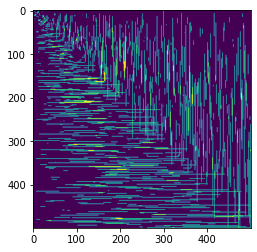

In [6]:
ax = plt.gca()
im = ax.imshow(Cmat)

In [11]:
# Jacobian Constructor from Cmatrix
J = np.empty((S,S), dtype = float)
for i in range(0,S):
    for j in range(0,S):
        if Cmat[i,j] == 1:
            int_val = rng.normal(0.0,sigma)
            int_val_rev = rng.normal(0.0,sigma)
            J[i,j] = int_val
            J[j,i] = int_val_rev
            if J[i,j] == "NaN":
                print("Uh Oh")
for i in range(0,S): 
    J[i,i] = -1

    

In [8]:
# Jacobian plotting
e = np.linalg.eigval(J)


AttributeError: module 'numpy.linalg' has no attribute 'eigval'

In [9]:
x = [ele.real for ele in e]
y = [ele.imag for ele in e]
ax = plt.scatter(x,y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

NameError: name 'e' is not defined

In [10]:
x = [ele.real for ele in e]
y = [ele.imag for ele in e]
ax = plt.scatter(x,y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

NameError: name 'e' is not defined